<a href="https://colab.research.google.com/github/WilkisterMbaka/Fifa-Score-Prediction-/blob/main/Moringa_Data_Science_Prep_W6_Independent_Project_2022_06_Wilkister_Mbaka_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Football Win / Lose Analysis**

## **1.0 Defining the Question**

**a) Specifying the Question**

* Build a model that predicts:
  * Model 1: Predict how many goals the home team scores.
  * Model 2: Predict how many goals the away team scores.
* Build a model that predicts whether the home team will win, lose or draw

**b) Defining the Metric for Success**

* Exploratory Data Analysis 
* Building regression models
* Model evaluation through cross validation, RMSE Scores, residual plots and Heteroscedascity

**c) Understanding the context**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

**d) Recording the Experimental Design**

1. Defining the question
2. Data Loading
3. Data Understanding
4. Data Preparation
5. Perform your EDA
6. Check of multicollinearity
7. Building the model
8. Cross-validate the model
9. Compute RMSE
10. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

## **2.0 Reading and Checking Data**

In [1]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt
%matplotlib inline

**Fifa Ranking Dataset**

In [2]:
# Loading the Data from the source i.e. csv
#
df_ranking = pd.read_csv('/content/fifa_ranking.csv')

# Check top 5 records
df_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
# Check bottom 5 records
df_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df_ranking.shape[0]} \nNumber of columns: {df_ranking.shape[1]}')

Number of rows: 57793 
Number of columns: 16


In [5]:
# Checking whether each column has an appropriate datatype
#
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [6]:
#Checking how many unique value are in a column
df_ranking.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [7]:
# Check for unique values in each column
for col in df_ranking.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df_ranking[col].unique(), end='\n')
  print('**********')
  print('\n')

rank column unique values: 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 147 168 169 170 171 172 173 174 176 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 207 206 208 209]
**********


country_full column unique values: 

['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'
 'Republic of Irel

**Results Dataset**

In [8]:
# Loading the Data from the source i.e. csv
#
df_results = pd.read_csv('/content/results.csv')

# Check top 5 records
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
# Check bottom 5 records
df_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [10]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df_results.shape[0]} \nNumber of columns: {df_results.shape[1]}')

Number of rows: 40839 
Number of columns: 9


In [11]:
# Checking whether each column has an appropriate datatype
#
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [12]:
#Checking how many unique value are in a column
df_results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [13]:
# Check for unique values in each column
for col in df_results.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df_results[col].unique(), end='\n')
  print('**********')
  print('\n')

date column unique values: 

['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']
**********


home_team column unique values: 

['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colo

## **3.0 Tidying the Dataset**

In [14]:
# Check for duplicates in ranking dataset
duplicate = df_ranking[df_ranking.duplicated()]

duplicate.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11


In [15]:
# Drop duplicates in ranking dataset
df_ranking.drop_duplicates(inplace=True)

In [16]:
# Check number of rows and columns after dropping duplicates
df_ranking.shape

(57756, 16)

In [17]:
# Check if ranking duplicates have been dropped
df_ranking.duplicated().sum()

0

In [18]:
# Check for duplicates in results dataset
duplicate = df_results[df_results.duplicated()]

duplicate

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


In [19]:
# Change the rank_date column to datetype in ranking dataset

df_ranking['rank_date'] = pd.to_datetime(df_ranking['rank_date'])

# Separate year and month
df_ranking['year'] = df_ranking.rank_date.dt.year
df_ranking['month'] = df_ranking.rank_date.dt.month

In [20]:
# Change the rank_date column to datetype in ranking dataset

df_results['date'] = pd.to_datetime(df_results['date'])

# Creating a year and month column from the datetime object
df_results['year'] = df_results.date.dt.year
df_results['month'] = df_results.date.dt.month

In [21]:
#Dropping unneccessary columns from the rankings dataset
df_ranking.drop(['total_points', 'previous_points', 'rank_change', 'cur_year_avg',
              'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
              'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
              'three_year_ago_weighted', 'country_abrv', 'confederation'], axis=1, inplace=True)
df_ranking.head(2)

,rank,country_full,rank_date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8


In [22]:
#Dropping unnecessary columns from results dataset
df_results.drop(['city', 'country'], axis=1, inplace=True)
df_results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,False,1873,3


In [23]:
# Filter out data to get games played after 1993 August 8th since this is when the rankings started
df_results = df_results.loc[(df_results['date'] >= '1993-08-08')]
                  
# Display
df_results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8


In [24]:
# Check number of rows and columns
df_results.shape

(22924, 9)

In [25]:
# Merging the two datasets to obtain the home_team rank dataset : home_team, year and month
home_df = pd.merge(df_results, df_ranking, left_on=['home_team','year','month'], right_on=['country_full','year','month'], how = 'inner')

# Renaming rank to home team rank
home_df = home_df.rename({'rank': 'home_rank'}, axis = 1)
home_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08
1,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08


In [26]:
# Check how many rows and columns in the merged dataset
home_df.shape

(18588, 12)

In [27]:
# Check for duplicates in merged dataset
home_df.duplicated().any()

False

In [28]:
# Check for missing values in the merged dataset
home_df.isnull().sum()

date            0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
neutral         0
year            0
month           0
home_rank       0
country_full    0
rank_date       0
dtype: int64

In [29]:
# Merging the two datasets to obtain the away_team rank dataset

away_df = pd.merge(df_results, df_ranking, left_on=['away_team','year','month'], right_on=['country_full','year','month'], how = 'inner')

#renaming the rank column to obtaing the away_team_rank

away_df = away_df.rename({'rank': 'away_rank'}, axis = 1)
away_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,22,Uruguay,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,14,Mexico,1993-08-08


In [30]:
# Check how many rows and columns in the merged dataset
away_df.shape

(18497, 12)

In [31]:
# Check for duplicates in merged dataset
away_df.duplicated().any()

False

In [32]:
# Check for missing values in the merged dataset
home_df.isnull().sum()

date            0
home_team       0
away_team       0
home_score      0
away_score      0
tournament      0
neutral         0
year            0
month           0
home_rank       0
country_full    0
rank_date       0
dtype: int64

In [33]:
# Merge home df and away df 
model_df = pd.concat([home_df, away_df], axis=1, join = 'inner')

model_df

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,...,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59,...,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,22,Uruguay,1993-08-08
1,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,False,1993,8,59,...,Mexico,1,1,Friendly,False,1993,8,14,Mexico,1993-08-08
2,1993-08-22,Bolivia,Venezuela,7,0,FIFA World Cup qualification,False,1993,8,59,...,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,94,Venezuela,1993-08-08
3,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8,...,Venezuela,7,0,FIFA World Cup qualification,False,1993,8,94,Venezuela,1993-08-08
4,1993-08-22,Brazil,Ecuador,2,0,FIFA World Cup qualification,False,1993,8,8,...,Venezuela,4,0,FIFA World Cup qualification,False,1993,8,94,Venezuela,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,2018-06-27,Mexico,Sweden,0,3,FIFA World Cup,True,2018,6,15,...,France,0,0,FIFA World Cup,True,2018,6,7,France,2018-06-07
18493,2018-06-02,Sweden,Denmark,0,0,Friendly,False,2018,6,24,...,Argentina,1,2,FIFA World Cup,True,2018,6,5,Argentina,2018-06-07
18494,2018-06-09,Sweden,Peru,0,0,Friendly,False,2018,6,24,...,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,2018-06-07
18495,2018-06-18,Sweden,South Korea,1,0,FIFA World Cup,True,2018,6,24,...,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,2018-06-07


In [34]:
# Drop duplicated columns
model_df = model_df.loc[:,~model_df.columns.duplicated()]

model_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,rank_date,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08,22
1,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08,14


In [35]:
#Dropping unnecessary columns fro results dataset
model_df = model_df.drop(['rank_date', 'country_full','date','neutral'], axis=1)
model_df.head(2)

,home_team,away_team,home_score,away_score,tournament,year,month,home_rank,away_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,8,59,22
1,Bolivia,Ecuador,1,0,FIFA World Cup qualification,1993,8,59,14


In [36]:
# Check for missing values in the dataset
model_df.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
year          0
month         0
home_rank     0
away_rank     0
dtype: int64

In [37]:
# Check for duplicates in the dataset
model_df.duplicated().sum()

6

In [38]:
# Drop duplicates in ranking dataset
model_df.drop_duplicates(inplace=True)

In [39]:
# Check if duplicates were dropped
model_df.duplicated().sum()

0

In [40]:
# we will create a function which will help us determine
# if the result was a win, lose or draw given the teams

model_df['outcome'] = model_df['home_score'] - model_df['away_score']

def outcome(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'

model_df['outcome'] = model_df.outcome.apply(lambda x: outcome(x))

model_df.head(2)

,home_team,away_team,home_score,away_score,tournament,year,month,home_rank,away_rank,outcome
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,8,59,22,Win
1,Bolivia,Ecuador,1,0,FIFA World Cup qualification,1993,8,59,14,Win


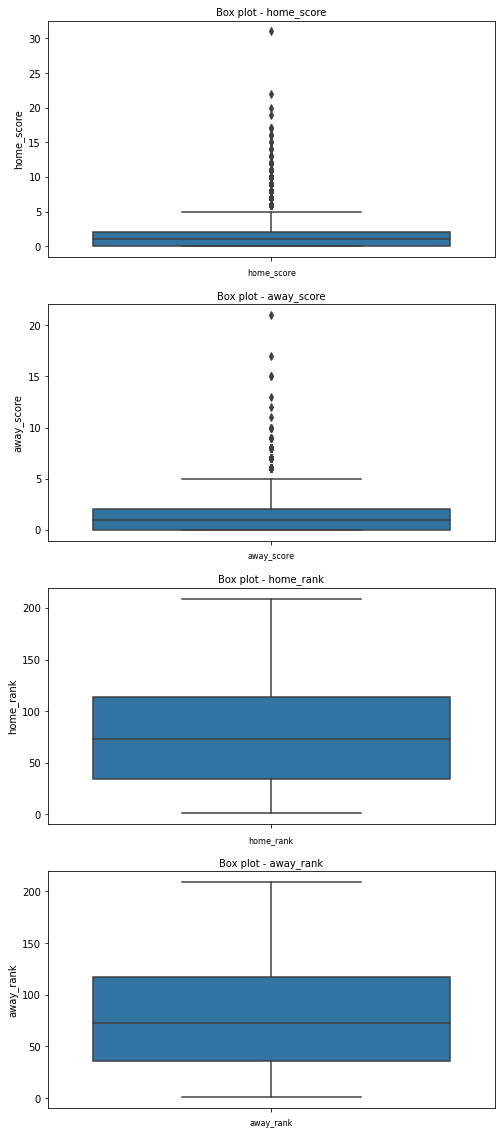

In [41]:
# Plotting columns with numerical values only to check for any outliers
col_names = ['home_score','away_score', 'home_rank', 'away_rank']

fig, ax = plt.subplots(len(col_names), figsize= (8,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = model_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

## **4.0 Exploratory Analaysis**

### **4.1 Univariate Analysis**

In [42]:
num_attributes = model_df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = model_df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

**Numerical Attributes**

In [43]:
model_df.head()

,home_team,away_team,home_score,away_score,tournament,year,month,home_rank,away_rank,outcome
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,8,59,22,Win
1,Bolivia,Ecuador,1,0,FIFA World Cup qualification,1993,8,59,14,Win
2,Bolivia,Venezuela,7,0,FIFA World Cup qualification,1993,8,59,94,Win
3,Brazil,Mexico,1,1,Friendly,1993,8,8,94,Draw
4,Brazil,Ecuador,2,0,FIFA World Cup qualification,1993,8,8,94,Win


In [44]:
# Getting the univariate describe summary

num_attributes.describe()

,home_score,away_score,year,month,home_rank,away_rank
count,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000
mean,1.624845,1.074415,2006.408739,6.892921,77.950787,79.812936
std,1.662173,1.262549,6.782668,3.293174,51.265149,52.227704
min,0.000000,0.000000,1993.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.000000,34.000000,36.000000
50%,1.000000,1.000000,2007.000000,7.000000,73.000000,73.000000
75%,2.000000,2.000000,2012.000000,10.000000,114.000000,117.000000
max,31.000000,21.000000,2018.000000,12.000000,209.000000,209.000000


In [45]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.var ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,home_score,2.762671,31.0,1.662128,2.403958,14.928949
1,away_score,1.593943,21.0,1.262515,2.181706,11.375388
2,year,46.002095,25.0,6.782484,-0.117038,-1.095483
3,month,10.844410,11.0,3.293085,-0.215026,-1.175653
4,home_rank,2627.973350,208.0,51.263763,0.408922,-0.746489
5,away_rank,2727.585525,208.0,52.226292,0.434433,-0.726062


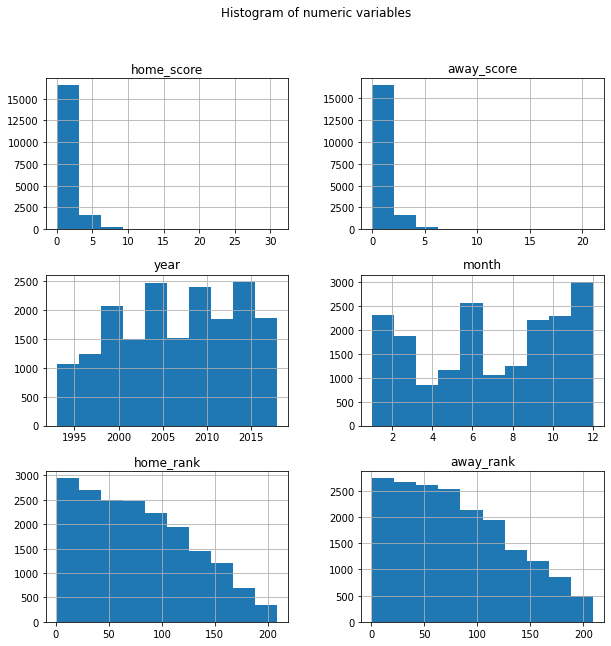

In [46]:
# Plotting the numerical variables on histogram to view their distributions.

model_df.hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Fifa Histogram')
plt.show()

**Categorical Attributes**

In [47]:
cat_attributes.head(1)

,home_team,away_team,tournament,outcome
0,Bolivia,Uruguay,FIFA World Cup qualification,Win


In [48]:
cat_attributes['home_team'].value_counts()

Mexico                      273
Japan                       233
Saudi Arabia                225
Qatar                       208
Oman                        205
                           ... 
Montserrat                    9
Chinese Taipei                9
Kosovo                        8
Gibraltar                     6
Turks and Caicos Islands      5
Name: home_team, Length: 193, dtype: int64

In [49]:
cat_attributes['away_team'].value_counts()

Zambia              189
Sweden              160
Paraguay            159
Finland             157
Brazil              156
                   ... 
Tibet                 1
Vatican City          1
Falkland Islands      1
Frøya                 1
Western Isles         1
Name: away_team, Length: 234, dtype: int64

In [50]:
cat_attributes['tournament'].value_counts()

Friendly                                6964
FIFA World Cup qualification            4260
UEFA Euro qualification                 1423
African Cup of Nations qualification     955
AFC Asian Cup qualification              426
                                        ... 
Dragon Cup                                 4
Intercontinental Cup                       4
SKN Football Festival                      3
Copa América qualification                 2
ELF Cup                                    1
Name: tournament, Length: 67, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


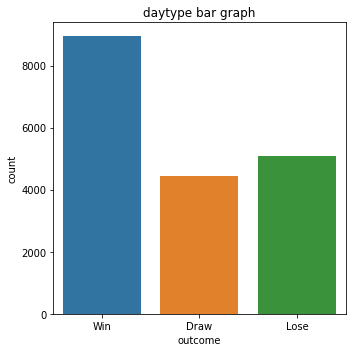

In [51]:
# Countplots
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(cat_attributes.outcome, x='outcome')
plt.title('Outcome bar graph for home teames')

plt.show()

From the graph we can see that most home teams win their games

### **4.2 Bivariate Analysis**

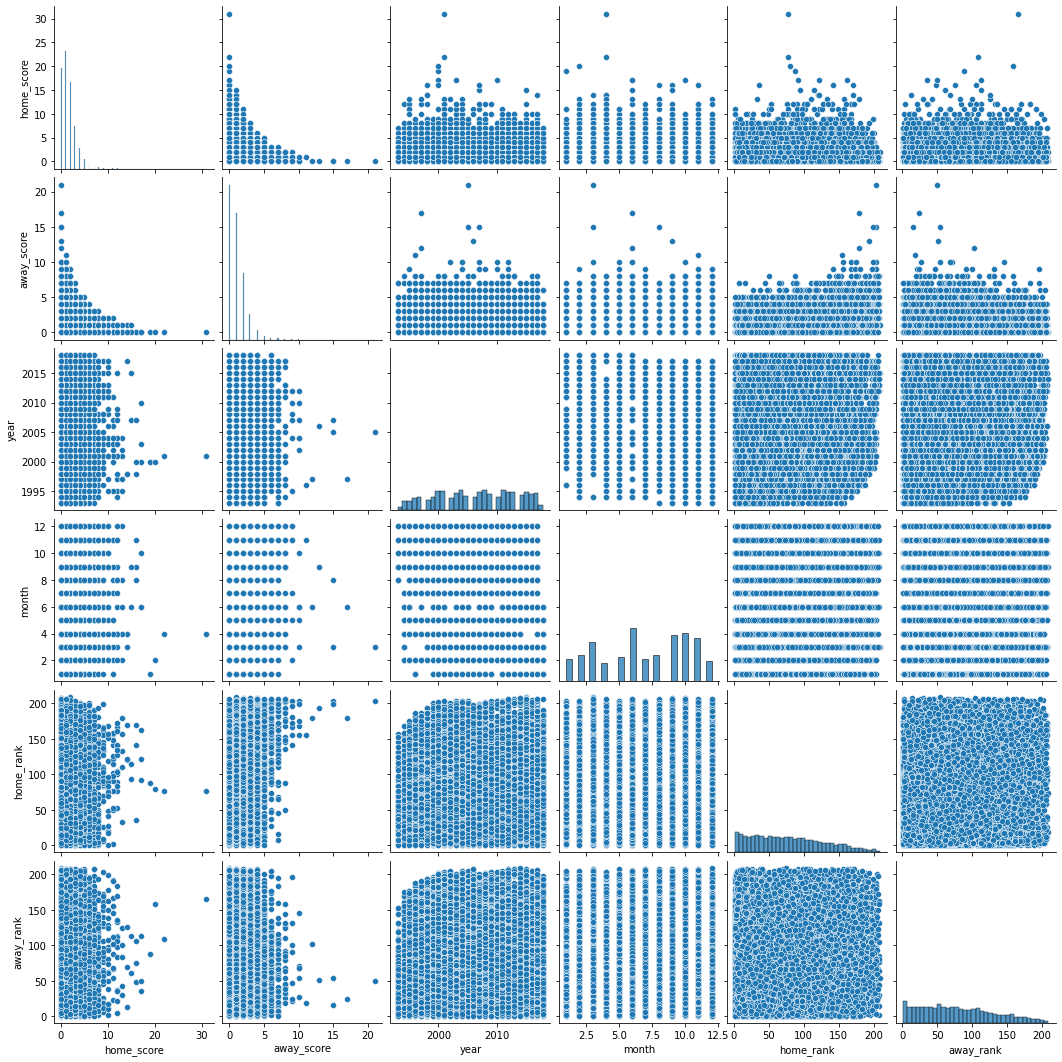

In [52]:
sns.pairplot(num_attributes)
plt.show()

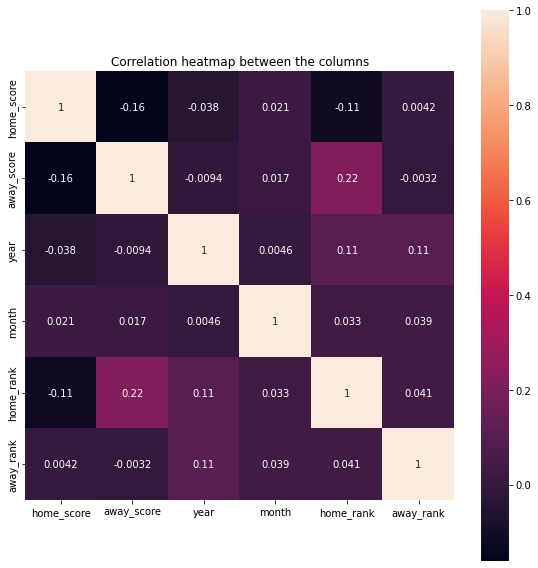

In [88]:
# Plot correlation heat map
plt.figure(figsize=(8,8))
sns.heatmap(num_attributes.corr(),square=True,annot=True);
plt.title('Correlation heatmap between the columns')
plt.show()

home rank and away score have a low positive correlation

In [54]:
# make a copy of a dataset
model_df1 = model_df.copy()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

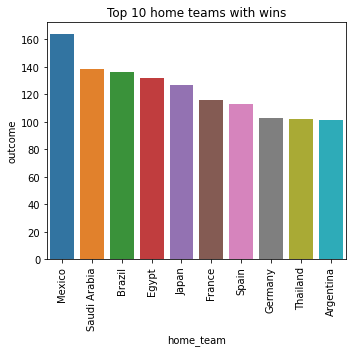

In [56]:
# Top 10 home teams with wins
#calculate count of values by group
wins = model_df1[model_df1['outcome'] == 'Win']
group = wins.groupby(['home_team'])['outcome'].count().nlargest(10)
group = group.reset_index()

# #create bar plot by group
sns.barplot(x='home_team',y='outcome',data=group)
plt.title('Top 10 home teams with wins')
plt.xticks(rotation=90)


From this graph we can see that Mexico has had the highest number of wins over the years

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

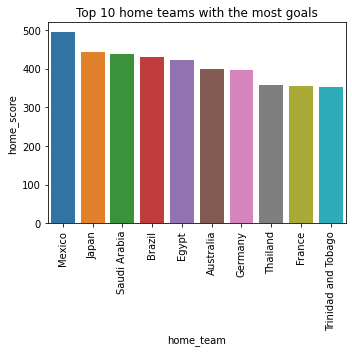

In [57]:
# Top 10 home teams with the most goals
#calculate sum of values by group
group1 = model_df1.groupby(['home_team'])['home_score'].sum().nlargest(10)
group1 = group1.reset_index()

# #create bar plot by group
sns.barplot(x='home_team',y='home_score',data=group1)
plt.title('Top 10 home teams with the most goals')
plt.xticks(rotation=90)

From this graph we can see that Mexico has scored a lot of goals over the years when they are the home team

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

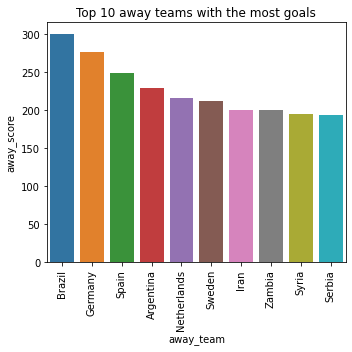

In [58]:
# Top 10 away teams with the most goals
#calculate sum of values by group
group2 = model_df1.groupby(['away_team'])['away_score'].sum().nlargest(10)
group2 = group2.reset_index()

# #create bar plot by group
sns.barplot(x='away_team',y='away_score',data=group2)
plt.title('Top 10 away teams with the most goals')
plt.xticks(rotation=90)

From this graph we can see that Brazil has scored a lot of goals over the years when they are the away team

## **5.0 Polynomial Regression**

In [59]:
# Creating a new column to store the tournament type

def tournament_group(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

model_df['tournament_X'] = model_df.tournament.apply(lambda x: tournament_group(x))
model_df['tournament_X'] .head(2)

0    Other
1    Other
Name: tournament_X, dtype: object

**VIF**

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
var = model_df[['away_score', 'home_rank', 'away_rank']]
  
# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = var.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  
print(vif_df)

      feature       VIF
0  away_score  1.714808
1   home_rank  2.455691
2   away_rank  2.082770


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


From the VIF score, they are all below 5 which is good for our model

### **5.1 Prediction for home team**

In [62]:
# #separating the dataset to features and label (model 1: Home scores)
# X = model_df[['home_team', 'away_team','tournament_X', 'home_rank', 'away_rank']]
X = model_df[['tournament_X', 'home_rank', 'away_rank']]
y = model_df['home_score']

X = pd.get_dummies(X)
home_model_df = X.copy()

In [63]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
#creating the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
model = PolynomialFeatures(degree = 2)

#Fitting the model:
X_train1 = model.fit_transform(X_train)
X_test1 = model.fit_transform(X_test)

#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)


In [65]:
#Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.1977113142110005
Mean Squared Error: 2.829220915410577
Root Mean Squared Error: 1.682028809328359
R-Squared: 0.008179050938698751


By using two degrees we get a r squared of 0.008 which is quite low so we try with 3 degrees

In [66]:
#creating the model
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

#Model Selection:
model = PolynomialFeatures(degree = 3)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)

In [67]:
# #Evaluating Model
# from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.2011729629861887
Mean Squared Error: 2.8140725143306478
Root Mean Squared Error: 1.6775197508019535
R-Squared: 0.013489524028311162


By using two degrees we get a r squared of 0.013

**Heteroskedasticity testing**

In [68]:
import scipy as sp

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
# print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


**Cross Validation**

In [92]:
from sklearn.model_selection import KFold

# We will use the same  independent variables for this
# X = model_df[['tournament', 'home_rank', 'away_rank']].values
# y = model_df['home_score'].values

X = home_model_df.values
y = model_df['home_score'].values

folds = KFold(n_splits=10)

#Printing the number of folds we will use
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

# set up the train and test based on the split determined by KFold
# With 10 folds, we will end up with 90% of our data in the training set, and 10% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)

  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.5641209463528323

Training model 2
Model 2 Root Mean Squared Error: 1.858813968862313

Training model 3
Model 3 Root Mean Squared Error: 1.9735033363990282

Training model 4
Model 4 Root Mean Squared Error: 1.706190302318361

Training model 5
Model 5 Root Mean Squared Error: 1.5684084887204752

Training model 6
Model 6 Root Mean Squared Error: 1.5963725788391565

Training model 7
Model 7 Root Mean Squared Error: 1.5738618651908922

Training model 8
Model 8 Root Mean Squared Error: 1.5317628161139554

Training model 9
Model 9 Root Mean Squared Error: 1.4751485520965022

Training model 10
Model 10 Root Mean Squared Error: 1.5643255533806428


From our cross validation we can see that there is no significant difference between the different folds

In [70]:
# Mean of RMSES
np.mean(RMSES)

1.5643255533806428

Comparing the average RMSE value of all these models to the one we obtain in our initial approach, As you can see, the average is fairly close to our initial value which was *1.6775197508019535*

### **5.2 Prediction for away team**

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
var = model_df[['home_score', 'home_rank', 'away_rank']]
  
# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = var.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  
print(vif_df)

      feature       VIF
0  home_score  1.599064
1   home_rank  2.123464
2   away_rank  2.292879


From the VIF score, they are all below 5 which is good for our model

In [72]:
#separating the dataset to features and label (model 1: Home scores)
# X = model_df[['home_team', 'away_team','tournament', 'home_rank', 'away_rank']]
# y = model_df['away_score']

X = model_df[['tournament_X', 'home_rank', 'away_rank']]
y = model_df['away_score']

X = pd.get_dummies(X)
away_model_df = X.copy()

In [73]:
# Splitting the data
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
#creating the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Model Selection:
model = PolynomialFeatures(degree = 2)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)

In [75]:
#Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.9140652717474096
Mean Squared Error: 1.56570786657019
Root Mean Squared Error: 1.251282488717152
R-Squared: 0.05627116342180272


By using two degrees we get a r squared of 0.05 which is quite low so we try with 3 degrees

In [76]:
#Model Selection:
model = PolynomialFeatures(degree = 3)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

#Applying Linear Regression:
Reg = LinearRegression()

#Fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)

In [77]:
#Evaluating Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.9096392123771377
Mean Squared Error: 1.5577118473800362
Root Mean Squared Error: 1.2480832694095518
R-Squared: 0.06109075591967472


By using two degrees we get a r squared of 0.062 which is better than 0.05627116342180272

**Heteroskedasticity testing**

In [78]:
import scipy as sp

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
# print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


**Cross Validation**

In [79]:
from sklearn.model_selection import KFold

# We will use the same  independent variables for this
# X = model_df[['home_team', 'away_team','tournament', 'home_rank', 'away_rank']].values
# y = model_df['away_score'].values

X = away_model_df.values
y = model_df['away_score'].values

folds = KFold(n_splits=10)

#Printing the number of folds we will use
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

# set up the train and test based on the split determined by KFold
# With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.2589443940956015

Training model 2
Model 2 Root Mean Squared Error: 1.2545491679236158

Training model 3
Model 3 Root Mean Squared Error: 1.2688198213761288

Training model 4
Model 4 Root Mean Squared Error: 1.2136727597484096

Training model 5
Model 5 Root Mean Squared Error: 1.3114452582091696

Training model 6
Model 6 Root Mean Squared Error: 1.235890700549361

Training model 7
Model 7 Root Mean Squared Error: 1.1706444489262062

Training model 8
Model 8 Root Mean Squared Error: 1.2208764215316963

Training model 9
Model 9 Root Mean Squared Error: 1.2017418202790333

Training model 10
Model 10 Root Mean Squared Error: 1.174732431878427


From our cross validation we can see that there is no significant difference between the different folds

In [80]:
# Mean of RMSES
np.mean(RMSES)

1.231131722451765

Comparing the average RMSE value of all these models to the one we obtain in our initial approach, As you can see, the average is fairly close to our initial value which was *1.2480832694095518*

## **6.0 Logistic Regression**

In [82]:
#Converting the categoricals to numericals:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

logistic_df = model_df.copy()

logistic_df['home_team'] = label_encoder.fit_transform (logistic_df['home_team'])
logistic_df['away_team'] = label_encoder.fit_transform (logistic_df['away_team'])

In [83]:
# Splitting our dataset
#
X = logistic_df[['home_team', 'away_team', 'tournament_X', 'home_rank', 'away_rank']]
# X = model_df.drop('outcome', axis = 1)
y = logistic_df['outcome']

# Encoding the categorical features
#
X = pd.get_dummies(X)

# Train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [84]:
# Build our logistic regressor
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [85]:
# Perform predictions
y_pred = logistic_regressor.predict(X_test)

In [86]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[   0,  198, 1170],
       [   0,  379, 1124],
       [   0,  321, 2356]])

We correctly predicted 2735 game outcomes 

In [87]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.49297043979812544


## **7.0 Challenging our solution**

The r squared in our models were way too low which suggets that our models are not reliable

The RMSE value in our polynomial regresssion models was over 1 which is not ideal for our model. *Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.*

The accuracy level of our logistic regression model is 49.297% which is not ideal. *Anything greater than 70% is a great model performance. In fact, an accuracy measure of anything between 70%-90% is not only ideal, it's realistic*